In [1]:
# The data used here was extracted from: https://www.kaggle.com/kaggle/sf-salaries
# EN: In this file we will use the 'pandas' library to analyse the San Francisco salaries data 
# PT: Nesse arquivo utilizaremos a biblioteca 'pandas' para analisar os dados de salários em São Francisco

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# EN: The first step is to read the "csv" file
# PT: O primeiro passo é ler o arquivo "csv" 

df = pd.read_csv("Salaries.csv")

In [3]:
# EN: Let's print the head of the dataframe to visualize the data and try to find useful information for the analysis
# PT: Vamos imprimir o cabeçalho dos dados para visualizá-los e tentar achar informações que possam ser úteis para a análise

df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
# EN: Apparently the 'Notes' and 'Status' Columns are filled with Null values, let's check that using the info
# PT: Aparentemente as colunas 'Notes' e 'Status' estão preenchidas com valores nulos, vamos utilizar o recurso info para verificar

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [5]:
# EN: Indeed the two columns are filled with null values, so we will remove them
# PT: De fato as duas colunas estão preenchidas com valores nulos, portanto ambas serão removidas 

df.drop(['Notes', 'Status'], axis=1, inplace=True)

In [6]:
# EN: Now let's check how many unique job titles there are
# PT: Agora vamos verificar quantos trabalhos únicos existem

df['JobTitle'].nunique()

2159

In [7]:
# EN: And let's check the 10 most frequent jobs and how many times they appear 
# PT: E vamos verificar quais são os 10 trabalhos mais comuns em San Francisco e quantas vezes eles aparecem

df['JobTitle'].value_counts().head(10)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Custodian                       2418
TRANSIT OPERATOR                2388
Firefighter                     2359
Recreation Leader               1971
Patient Care Assistant          1945
Name: JobTitle, dtype: int64

<AxesSubplot:xlabel='TotalPayBenefits', ylabel='Count'>

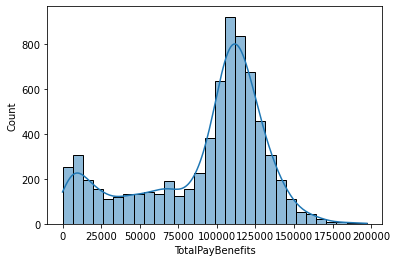

In [8]:
# EN: Using Seaborn let's plot the salaries distribution for the most common profession 
# PT: Utilizando Seaborn vamos plotar a distribuição de salários para a profissão mais comum  
sns.histplot( df[df['JobTitle'] == 'Transit Operator']['TotalPayBenefits'], bins=30, kde=True)

In [9]:
# EN: We can see that most of the Transit operators receive between 100000 and 150000 and that there's 
#a percentage that makes less than 25000. Let's Count how many make less than 25000 and how make make more

# PT: Podemos visualizar no gráfico acima que a maioria dos operadores de trânsito recebe entre 100000 e 150000 
#e que há uma porcentagem que recebe menos de 25000. Vamos contar quantos ganham menos de 25000 e quantos ganham mais

(df[df['JobTitle'] == 'Transit Operator']['TotalPayBenefits']<=25000).value_counts()

False    6148
True      888
Name: TotalPayBenefits, dtype: int64

In [10]:
# EN: Now let's see the highest pay among all workers
# PT: Vamos avaliar qual é o maior pagamento entre todos os trabalhadores
df['TotalPayBenefits'].max()

567595.43

In [11]:
# EN: And lets get the information of the person who receives the highest pay
# PT: Vamos verificar as informações da pessoa com o maior pagamento

df[df['TotalPayBenefits'] == df['TotalPayBenefits'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco


In [12]:
# EN: What is the average BasePay of all the employees per year 
# PT: Qual é a média de salário base de todos os empregados por ano

df.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

In [13]:
# EN: And finally let's check if the length of the job title has correlation with payment
# PT: por último, vamos verificar se o comprimento do título do trabalho tem correlação com o salário 

df['title_len'] = df['JobTitle'].apply(len)
df[['title_len','TotalPayBenefits']].corr()

,title_len,TotalPayBenefits
title_len,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


In [14]:
# EN: As expected, the two variables are not correlated
# PT: Como era de se esperar, as duas variáveis não possuem correlação